## To Analyse Association_rules 

In [8]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth,association_rules

# Example dataset
data = [
    ['bread', 'milk', 'cookie', 'eggs'],
    ['bread', 'milk', 'cookie', 'soup'],
    ['bread', 'milk', 'cookie'],
    ['turkey', 'eggs'],
    ['eggs', 'cookies'],
    ['milk', 'diaper', 'bread'],
    ['bread', 'diaper'],
    ['bread', 'milk', 'cookie', 'avocado'],
    ['bread', 'milk', 'cookie'],
    ['bread', 'milk', 'cookie', 'eggs']
]

# Create a DataFrame with one-hot encoding
df = pd.DataFrame(data)
df = df.stack().reset_index().pivot_table(index='level_0', columns=0, aggfunc=lambda x: 1, fill_value=0)

# Apply the FP-growth algorithm
frequent_itemsets = fpgrowth(df, min_support=0.2, use_colnames=True)
association= association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)
# Display frequent itemsets
# print(frequent_itemsets)
print("association rules")
# print(association)
association
# df

association rules


C:\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"((level_1, bread))","((level_1, milk))",0.8,0.7,0.7,0.875000,1.250000,0.14,2.4,1.000000
1,"((level_1, milk))","((level_1, bread))",0.7,0.8,0.7,1.000000,1.250000,0.14,inf,0.666667
2,"((level_1, cookie))","((level_1, milk))",0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
3,"((level_1, milk))","((level_1, cookie))",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
4,"((level_1, cookie))","((level_1, bread))",0.6,0.8,0.6,1.000000,1.250000,0.12,inf,0.500000
5,"((level_1, bread))","((level_1, cookie))",0.8,0.6,0.6,0.750000,1.250000,0.12,1.6,1.000000
6,"((level_1, cookie), (level_1, bread))","((level_1, milk))",0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,"((level_1, cookie), (level_1, milk))","((level_1, bread))",0.6,0.8,0.6,1.000000,1.250000,0.12,inf,0.500000
8,"((level_1, bread), (level_1, milk))","((level_1, cookie))",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
9,"((level_1, cookie))","((level_1, bread), (level_1, milk))",0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000



FP-tree structure:


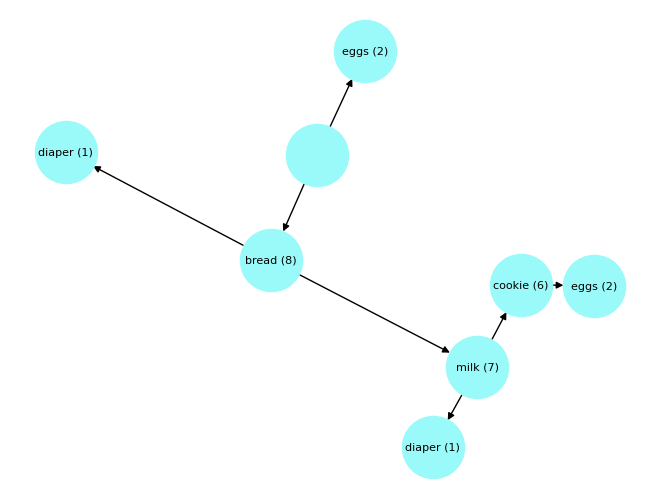

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

# Sample dataset
dataset = [
    ['bread', 'milk', 'cookie', 'eggs'],
    ['bread', 'milk', 'cookie', 'soup'],
    ['bread', 'milk', 'cookie'],
    ['turkey', 'eggs'],
    ['eggs', 'cookies'],
    ['milk', 'diaper', 'bread'],
    ['bread', 'diaper'],
    ['bread', 'milk', 'cookie', 'avocado'],
    ['bread', 'milk', 'cookie'],
    ['bread', 'milk', 'cookie', 'eggs'],
]

# Step 1: Count the frequency of each item
def count_items(transactions):
    item_count = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            item_count[item] += 1
    return item_count

# Step 2: Sort items within each transaction by frequency
def sort_transaction(transaction, item_count):
    return sorted([item for item in transaction if item in item_count], key=lambda x: item_count[x], reverse=True)

# Step 3: Tree Node definition for FP-tree
class FPTreeNode:
    def __init__(self, item, count=1):
        self.item = item
        self.count = count
        self.children = {}
        self.parent = None

# Step 4: Build FP-tree and visualize it using NetworkX
class FPTree:
    def __init__(self):
        self.root = FPTreeNode(None, 1)  # Root node does not represent any item
        self.graph = nx.DiGraph()  # Directed graph to visualize the tree

    def insert_transaction(self, transaction):
        current_node = self.root
        for item in transaction:
            if item in current_node.children:
                current_node.children[item].count += 1
            else:
                new_node = FPTreeNode(item)
                new_node.parent = current_node
                current_node.children[item] = new_node
                self.graph.add_node(new_node, label=f'{item}: {new_node.count}')
                self.graph.add_edge(current_node, new_node)
            current_node = current_node.children[item]

    def visualize_tree(self):
        pos = nx.spring_layout(self.graph)  # Layout for the nodes
        labels = {node: node.item + f' ({node.count})' for node in self.graph.nodes() if node.item}
        nx.draw(self.graph, pos, labels=labels, with_labels=True, node_size=2000, node_color='#9afafa', font_size=8)
        plt.show()

# Step 5: Build the FP-tree
def build_fp_tree(transactions, min_support):
    item_count = count_items(transactions)
    item_count = {k: v for k, v in item_count.items() if v >= min_support}  # Filter items by min_support
    tree = FPTree()
    for transaction in transactions:
        sorted_transaction = sort_transaction(transaction, item_count)
        if sorted_transaction:
            tree.insert_transaction(sorted_transaction)
    return tree

# Step 6: FP-Growth main function
def fp_growth(transactions, min_support=2):
    tree = build_fp_tree(transactions, min_support)
    print("\nFP-tree structure:")
    tree.visualize_tree()

# Execute FP-Growth and visualize tree
fp_growth(dataset, min_support=2)
